In [1]:
from src.data_processing import HyperspectralImage, PerturbedSimpleDataPatches, generate_simple_patches
from torch.utils.data import DataLoader
from src.models import Autoencoder
from src.train_utils import train_model
from src.conf import BATCH_SIZE
from src.loss_functions import balance_loss
import matplotlib.pyplot as plt

/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

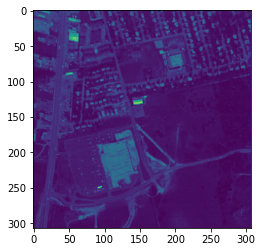

original_image_dataloader torch.Size([10, 162, 40, 40])


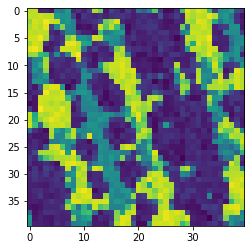

In [2]:
urban = HyperspectralImage(image_path="datasets/urban/Urban.mat",
                           ground_truth_path="datasets/urban/end6_groundTruth.mat",
                           n_bands=162, n_row=307, n_col=307, n_sources=6)

X_1_estim = np.load('results/first_estimation/X_1_estim.npy')
A_1_estim = np.load('results/first_estimation/A_1_estim.npy')
S_1_estim = np.load('results/first_estimation/S_1_estim.npy')

generate_simple_patches(urban, A_1_estim, S_1_estim)

plt.imshow(urban.X[0])
plt.show()

pertubed_image_dataset = PerturbedSimpleDataPatches()


pertubed_image_dataloader = DataLoader(dataset=pertubed_image_dataset, batch_size=BATCH_SIZE, shuffle=True)
a = next(iter(pertubed_image_dataloader))
print('original_image_dataloader', a["X"].shape)
plt.imshow(a['X'][0][50])
plt.show()

TRAINING WILL BE DONE ON cpu
 Epoch 1/50
----------------------------------------
Learning rate: 0.01


100%|███████████████████████████████████████████| 20/20 [00:10<00:00,  1.96it/s]


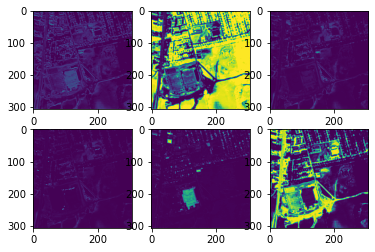

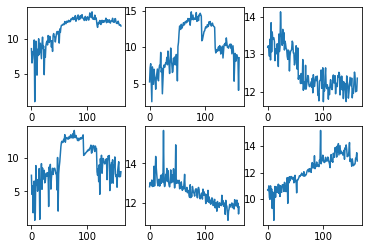

Loss: 1.7020
 Epoch 2/50
----------------------------------------
Learning rate: 0.01


100%|███████████████████████████████████████████| 20/20 [00:10<00:00,  1.95it/s]


Loss: 0.8581
 Epoch 3/50
----------------------------------------
Learning rate: 0.01


100%|███████████████████████████████████████████| 20/20 [00:10<00:00,  1.95it/s]


Loss: 0.6640
 Epoch 4/50
----------------------------------------
Learning rate: 0.01


100%|███████████████████████████████████████████| 20/20 [00:10<00:00,  1.95it/s]


Loss: 0.6085
 Epoch 5/50
----------------------------------------
Learning rate: 0.01


100%|███████████████████████████████████████████| 20/20 [00:10<00:00,  1.95it/s]


Loss: 0.5395
 Epoch 6/50
----------------------------------------
Learning rate: 0.01


100%|███████████████████████████████████████████| 20/20 [00:10<00:00,  1.96it/s]


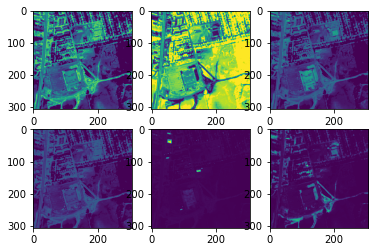

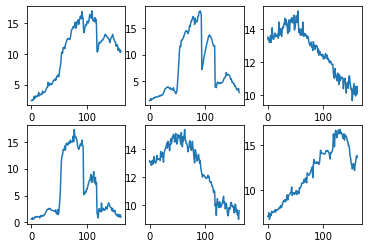

Loss: 0.5418
 Epoch 7/50
----------------------------------------
Learning rate: 0.01


100%|███████████████████████████████████████████| 20/20 [00:10<00:00,  1.95it/s]


Loss: 0.5079
 Epoch 8/50
----------------------------------------
Learning rate: 0.01


100%|███████████████████████████████████████████| 20/20 [00:10<00:00,  1.96it/s]


Loss: 0.5036
 Epoch 9/50
----------------------------------------
Learning rate: 0.01


100%|███████████████████████████████████████████| 20/20 [00:10<00:00,  1.96it/s]


Loss: 0.4488
 Epoch 10/50
----------------------------------------
Learning rate: 0.01


100%|███████████████████████████████████████████| 20/20 [00:10<00:00,  1.96it/s]


Loss: 0.4718
 Epoch 11/50
----------------------------------------
Learning rate: 0.01


100%|███████████████████████████████████████████| 20/20 [00:10<00:00,  1.96it/s]


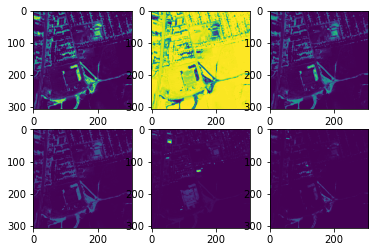

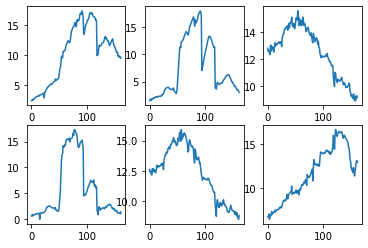

Loss: 0.4638
 Epoch 12/50
----------------------------------------
Learning rate: 0.01


100%|███████████████████████████████████████████| 20/20 [00:10<00:00,  1.96it/s]


Loss: 0.4760
 Epoch 13/50
----------------------------------------
Learning rate: 0.01


 25%|███████████                                 | 5/20 [00:02<00:07,  1.90it/s]


KeyboardInterrupt: 

In [3]:
model = Autoencoder(channel_number=urban.n_bands, source_number=urban.n_sources)
model, loss_train = train_model(model, urban.X,
                                      pertubed_image_dataloader,
                                      balance_loss, num_epochs=50, n_sources=6, need_plot=True)

In [ ]:
torch.save(model.state_dict(), "results/models_weights/urban_simple_perturbed_no_patches.pth")

X, A, S = model(torch.Tensor(urban.data[None, :, :, :])
X, A, S = X.detach().numpy()[0], A.detach().numpy(), S.detach().numpy()[0]
# Endmembers normalization
for i in range(A.shape[1]):
        M = A[:, i].max().item()
        A[:, i] = A[:, i]/M
                      
print('compare_endmembers', compare_endmembers(urban, A))
plt.figure(figsize=(8,6))
for ii in range(6): 
    ax = plt.subplot(2, 3, ii+1)
    ax.plot(A[:,ii])
plt.show()
                
print('compare_abundances', compare_abundances(urban, S))
plt.figure(figsize=(8,6))
for ii in range(6): 
    ax = plt.subplot(2, 3, ii+1)
    ax.imshow(S[ii, :, :])  
plt.show()
